## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```Python
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
        
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

#### `Q-1:` Create a DataFrame birds from the above dictionary data which has the index labels.
- Display basic information about the dataFrame.
- Show Alternate rows of the dataframe.

In [32]:
import numpy as np
import pandas as pd

data = {
    'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
    'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
    'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']
}
        
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data)
birds['label'] = labels
birds.head()

,birds,age,visits,priority,label
0,Cranes,3.5,2,yes,a
1,Cranes,4.0,4,yes,b
2,plovers,1.5,3,no,c
3,spoonbills,NaN,4,NaN,d
4,spoonbills,6.0,3,no,e


In [33]:
# Basic Information
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
 4   label     11 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 572.0+ bytes


In [34]:
# Alternate Rows
birds.iloc[::2, :]
# birds[::2, :] -> Throws an error, we cannot access the dataset in sllices like seperate columns and rows


,birds,age,visits,priority,label
0,Cranes,3.5,2,yes,a
2,plovers,1.5,3,no,c
4,spoonbills,6.0,3,no,e
6,plovers,5.5,2,no,g
8,spoonbills,8.0,3,no,i
10,Cranes,3.5,2,yes,k


#### `Q-2:`
- Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']
- Select rows where the number of visits is less than 4.

In [35]:
birds.loc[[1, 3, 7], ['birds', 'age']]

,birds,age
1,Cranes,4.0
3,spoonbills,NaN
7,Cranes,NaN


#### `Q-3:`
- Select all rows with nan values in age and visits column.
- Fill nan with respective series mode value.

In [36]:
# NaN values present in age and priority
birds[birds['age'].isna() | birds['priority'].isna()]

,birds,age,visits,priority,label
3,spoonbills,NaN,4,NaN,d
7,Cranes,NaN,2,yes,h


In [30]:
birds.loc[:, 'age'] = birds.loc[:, 'age'].fillna(birds.loc[:, 'age'].mode()[0])
birds.loc[:, 'priority'] = birds.loc[:, 'priority'].fillna(birds.loc[:, 'priority'].mode()[0])
birds.head()

,birds,age,visits,priority,label
0,Cranes,3.5,2,yes,a
1,Cranes,4.0,4,yes,b
2,plovers,1.5,3,no,c
3,spoonbills,3.5,4,no,d
4,spoonbills,6.0,3,no,e


In [39]:
birds.fillna(value = {
    'age': birds.loc[:, 'age'].mode()[0],
    'priority': birds.loc[:, 'priority'].mode()[0]
}, inplace = True)

#### `Q-4`
- Find the total number of visits of the bird Cranes
- Find the number of each type of birds in dataframe.
- Print no of duplicate rows
- Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [40]:
birds[birds['birds'] == 'Cranes']['visits'].sum()

14

In [41]:
birds['birds'].value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [42]:
birds.duplicated().sum()

0

In [43]:
birds.drop_duplicates(inplace = True)

#### `Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```Python
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [75]:
ipl = pd.read_csv("ipl.csv")

ipl['Team1'] = ipl['Team1'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings'
})
ipl['Team2'] = ipl['Team2'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings'
})

ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


#### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


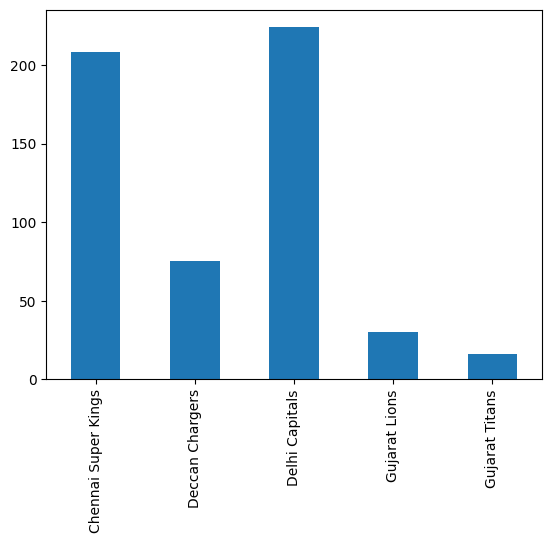

In [76]:
import matplotlib.pyplot as plt
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts())[:5].plot(kind = 'bar')
plt.show()

#### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [77]:
ipl[(ipl['Team1'] == "Mumbai Indians") | (ipl['Team2'] == "Mumbai Indians")]['Player_of_Match'].value_counts().to_frame().index[0]

'RG Sharma'

#### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```Python
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [87]:
def dashbord(team1, team2):
    # Win loss record
    temp = ipl[((ipl["Team1"] == team1) & (ipl['Team2'] == team2)) | ((ipl["Team2"] == team1) & (ipl['Team1'] == team2))]
    print(temp['Player_of_Match'].value_counts().index[0])
    return temp['WinningTeam'].value_counts()

dashbord("Mumbai Indians", "Chennai Super Kings")

KA Pollard


WinningTeam
Mumbai Indians         20
Chennai Super Kings    14
Name: count, dtype: int64

#### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='Venue'>

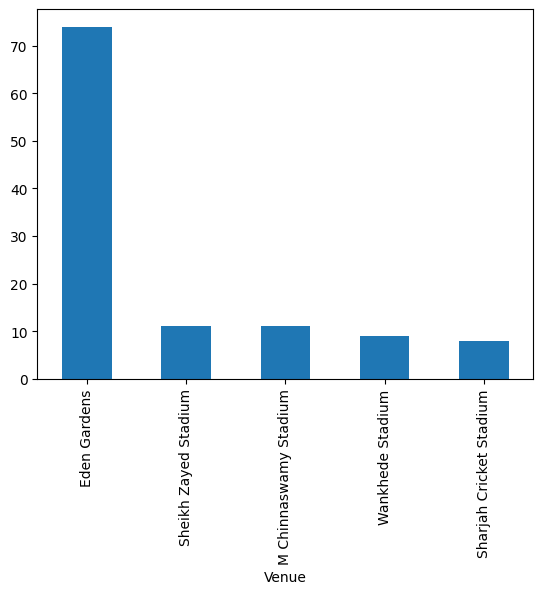

In [89]:
ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]['Venue'].value_counts()[:5].plot(kind = 'bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [90]:
ipl[((ipl.Team1 == "Mumbai Indians") | (ipl.Team2 == "Mumbai Indians")) & (ipl.Season == "2011")].Margin.mean()

19.25